In [59]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression


In [386]:
X, y = make_regression(n_samples=1000, n_features = 100, n_informative = 1, random_state = 0, noise = 1)

In [387]:
X.shape

(1000, 10)

### Using housing data set to test on. 

In [49]:
data = pd.read_csv('data/train.csv')

In [50]:
data.shape

(1460, 81)

In [51]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data = data.drop(col, axis=1)
    

In [52]:
data.shape

(1460, 62)

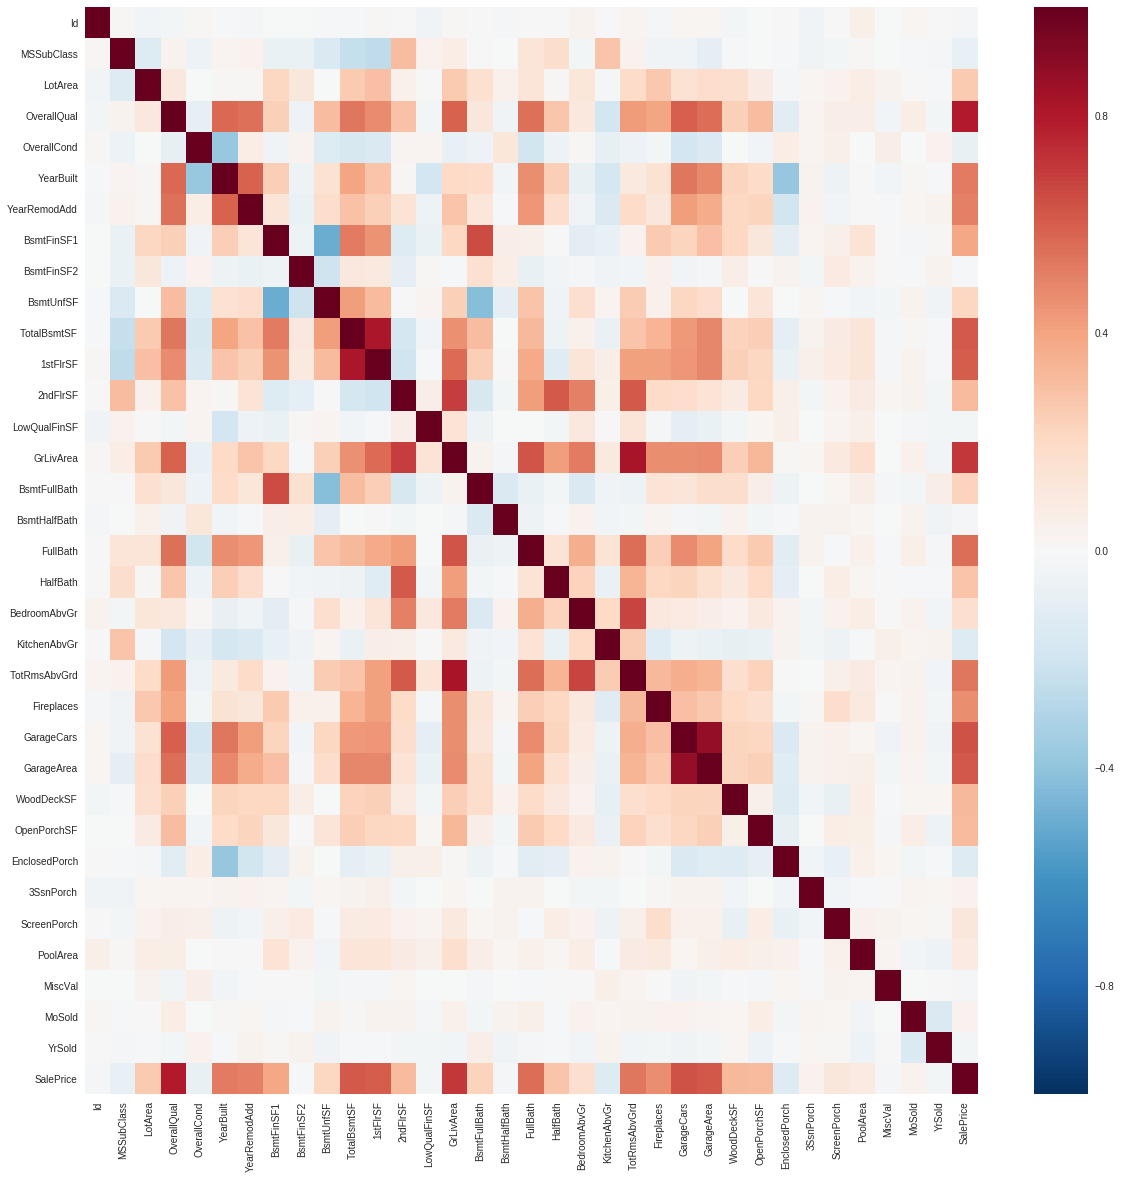

In [62]:
fig = plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr)
plt.show()

In [68]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [75]:
numeric_col = []
for col in data.columns:
    if data[col].dtype != 'int64':
        data = data.drop(col, axis=1)

In [76]:
data.shape

(1460, 35)

In [77]:
data.to_csv('data/train_nonan.csv')

In [93]:
data = data.set_index('Id')

In [117]:
target = data['SalePrice']
data = data.drop('SalePrice', axis=1)

In [224]:
data.shape

(1460, 33)

## Timing difference

In [113]:
%%timeit 
(data - data.mean()) / (data.max() -  data.min())

2.43 ms ± 9.04 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [115]:
%%timeit
(data.values - data.mean().values) / (data.max().values - data.min().values)

1.13 ms ± 5.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


type

In [557]:
def Scaler(data):
    
    if type(data) == np.ndarray:
        return (data - data.mean()) / (data.max() -  data.min())
    else:
        return (data.values - data.mean().values) / (data.max().values - data.min().values)

In [121]:
target = target.values
scaled_data = (data.values - data.mean().values) / (data.max().values - data.min().values)

### Training set,  Testing set Split

### 

In [154]:
int(scaled_data.shape[0]*.75)

1095

In [199]:
# o_shape = scaled_data.shape[0]
# l_shape = scaled_data.shape[1]
r = np.arange(len(scaled_data))
size = int(.75 * len(scaled_data))
j = np.random.sample(1462)

In [174]:
len(np.unique(rows))

768

### Use for train test split untill a better optimization can be found

In [200]:
from sklearn.model_selection import train_test_split

In [380]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.5)

### Score Testing

In [795]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

LR = LinearRegression()
sc = StandardScaler()

In [868]:
X, y = make_regression(n_features=10, n_informative=1, noise=1)
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.5, random_state=0)


In [870]:
X_tr, X_ts, y_tr, y_ts = train_test_split(scaled_data, target, test_size=.5, random_state=0)

In [871]:
xsr1 = Scaler(X_tr)
xss1 = Scaler(X_ts)

xsr2 = sc.fit_transform(X_tr)
xss2 = sc.fit_transform(X_ts)


In [ ]:
###

In [878]:
LR.fit(xsr1, y_tr)
print(LR.coef_[0:5], '\n')
print(LR.score(xss1, y_ts))

[ -43550.40434711  168421.57982811  241498.09305845   58291.44300213
   92897.82360387] 

0.712107101694


In [879]:
betas = fit(xsr1, y_tr)
print(betas[0:5], '\n')
score(xss1, y_ts)

[  3.97187091e+16  -5.12685734e+04   1.64409925e+06   1.89383803e+05
   4.91306532e+04] 

-9.88291766485e+23


In [863]:
LR.fit(xsr2, y_tr)
print(LR.coef_[0:5], '\n')
print(LR.score(xss2, y_ts))

[ -6468.13102262   5352.09483465  21606.79800704   4670.84757302
  11897.5099683 ] 

-1.28382124408e+21


In [864]:
LR.fit(X_tr, y_tr)
print(LR.coef_[0:5], '\n')
print(LR.score(X_ts, y_ts))

[ -25620.64704146   99437.7926914   142414.85016178   34446.31583697
   54894.38167059] 

0.712283122076


In [865]:
betas = fit(xsr2, y_tr)
print(betas[0:5], '\n')
score(xss2, y_ts)

[ 181336.22090289    2581.18200032   13380.97017627   34863.08202357
    1706.45225116] 

-3.46606960466e+23


In [866]:
betas = fit(X_tr, y_tr)
print(betas[0:5], '\n')
score(X_ts, y_ts)

[  170344.00709098   -56817.92827733 -2251946.82013451   262866.02598438
    -4488.1792241 ] 

-4.09583003275


In [831]:
len(X_ts)

730

In [876]:
def fit(X=None, y=None):
    
#     X = X - X.mean()
#     y = y - y.mean()

    ones = np.ones(X.shape[0])
    X_ = np.column_stack((ones, X))
    
    betas = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
    
    return betas

def score(X=None, y=None, model=None):
    
    beta_0 = betas[0]
    betas_X = betas[1:]
    
    y_pred = beta_0 + X.dot(betas_X)
    
    RSS = ((y_pred - y) ** 2).sum()
    TSS = ((y - y.mean()) ** 2).sum()
    
    R2 = 1 - (RSS/TSS)

    print(R2)

In [ ]:
def score(X=None, y=None, model=None):
    
    beta_0 = betas[0]
    betas_X = betas[1:]
    
    y_pred = beta_0 + X.dot(betas_X)
    y_pred_ = bet_0 + 
    
    RSS = ((y_pred - y) ** 2).sum()
    TSS = ((y - y.mean()) ** 2).sum()
    
    R2 = 1 - (RSS/TSS)

    print(R2)

In [ ]:
def train_split(data=None, target=None, target_col=None):
    
    if target == None & target_col == None :
        raise Value_
        
        

$$Alpha \hspace{1cm}A\alpha$$ 